# Missing Values

A missing values occur when no data value is stored for the variable in an observation. They are represented most of the time by NULL or None. Not handling them can lead to unexpected results (For example some ML algorithms can not perform well because they can not handle missing values) and even worst, it can lead to wrong assumptions.

Handling them is a very important step of the Data Preparation life cycle.

There are 3 main types of missing values:

<ul class="ul_content">
 <li><b>MCAR (Missing Completely at Random)</b> : The events that lead to any particular data-item being missing occur entirely at random. For example: in IOT, because of some transmission problems, some of the data related to the sensors could be lost.</li>
 <li><b>MAR (Missing {Conditionally} at Random)</b> : The missingness is not random, but it is related to some of the observed data. For example: Some students may have not answered to some specific questions of a test because they were absent during the related lesson.</li>
 <li><b>MNAR (Missing not at Random)</b> : The value of the variable that’s missing is related to the reason it’s missing. If someone didn’t subscribe to a loyalty program, we can leave an empty cell to avoid useless data storing.</li>
</ul>

Depending on the Missing Values Types, the imputation will be more or less obvious. For example, when dealing with MCAR it is possible to use mathematical aggregations to impute the missing values. For MNAR, we can simply create another category whereas for MAR we will need to investigate to find the best way to impute the data. To see how to handle missing values in VerticaPy, we will use the well-known 'Titanic' dataset.

,123pclassInt,123survivedInt,AbcVarchar(164),AbcsexVarchar(20),"123ageNumeric(6,3)",123sibspInt,123parchInt,AbcticketVarchar(36),"123fareNumeric(10,5)",AbccabinVarchar(30),AbcembarkedVarchar(20),AbcboatVarchar(100),123bodyInt,Abchome.destVarchar(100)
1,1,0,,female,2.0,1,2,113781,151.55,C22 C26,S,[null],[null],"Montreal, PQ / Chesterville, ON"
2,1,0,,male,30.0,1,2,113781,151.55,C22 C26,S,[null],135,"Montreal, PQ / Chesterville, ON"
3,1,0,,female,25.0,1,2,113781,151.55,C22 C26,S,[null],[null],"Montreal, PQ / Chesterville, ON"
4,1,0,,male,39.0,0,0,112050,0.0,A36,S,[null],[null],"Belfast, NI"
5,1,0,,male,71.0,0,0,PC 17609,49.5042,[null],C,[null],22,"Montevideo, Uruguay"
6,1,0,,male,47.0,1,0,PC 17757,227.525,C62 C64,C,[null],124,"New York, NY"
7,1,0,,male,[null],0,0,PC 17318,25.925,[null],S,[null],[null],"New York, NY"
8,1,0,,male,24.0,0,1,PC 17558,247.5208,B58 B60,C,[null],[null],"Montreal, PQ"
9,1,0,,male,36.0,0,0,13050,75.2417,C6,C,A,[null],"Winnipeg, MN"
10,1,0,,male,25.0,0,0,13905,26.0,[null],C,[null],148,"San Francisco, CA"

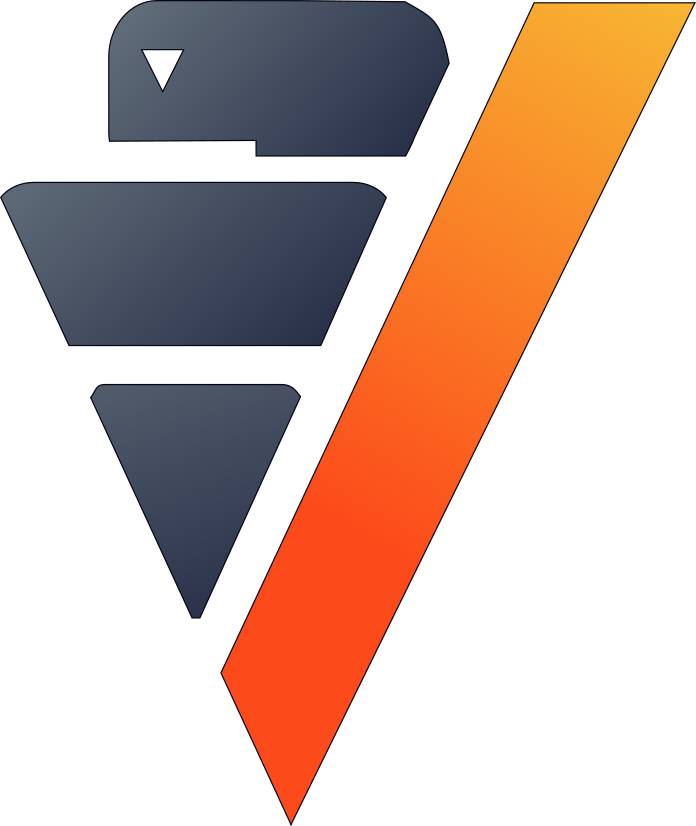

In [2]:
from verticapy import *
vdf = vDataFrame("titanic")
display(vdf)

We can look at all the missing values using the 'count' method.

,count,percent
"""pclass""",1234.0,100.0
"""survived""",1234.0,100.0
"""name""",1234.0,100.0
"""sex""",1234.0,100.0
"""sibsp""",1234.0,100.0
"""parch""",1234.0,100.0
"""ticket""",1234.0,100.0
"""fare""",1233.0,99.919
"""embarked""",1232.0,99.838
"""age""",997.0,80.794

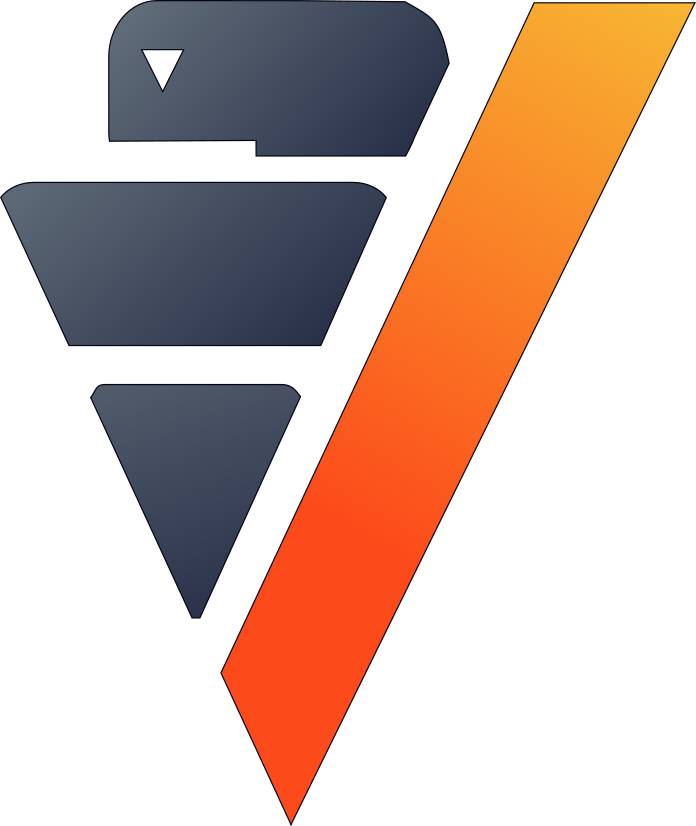

In [3]:
vdf.count()

The missing values of the 'boat' features are MNAR. Indeed, missing values of this feature represents passengers who didn't pay for the 'lifeboat' option. We can replace all the missing values by a new category using the 'fillna' method.

795 elements were filled.


,AbcboatVarchar(100)
1,No Lifeboat
2,No Lifeboat
3,No Lifeboat
4,No Lifeboat
5,No Lifeboat
6,No Lifeboat
7,No Lifeboat
8,No Lifeboat
9,A
10,No Lifeboat

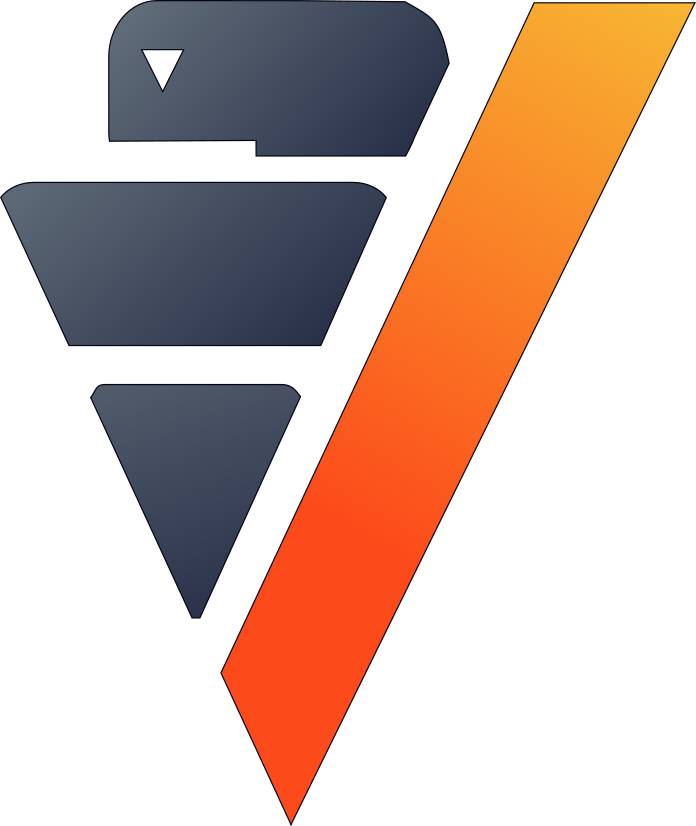

In [4]:
vdf["boat"].fillna("No Lifeboat")
vdf["boat"]

Missing values of the feature 'age' seems to be MCAR so the best way to impute them is using mathematical aggregations. Let's impute the age using the averaged age of the passenger having the same sex and class.

237 elements were filled.


,123ageFloat
1,36.0
2,31.0
3,21.0
4,50.0
5,45.0
6,31.0
7,55.0
8,60.0
9,35.0
10,37.2635658914729

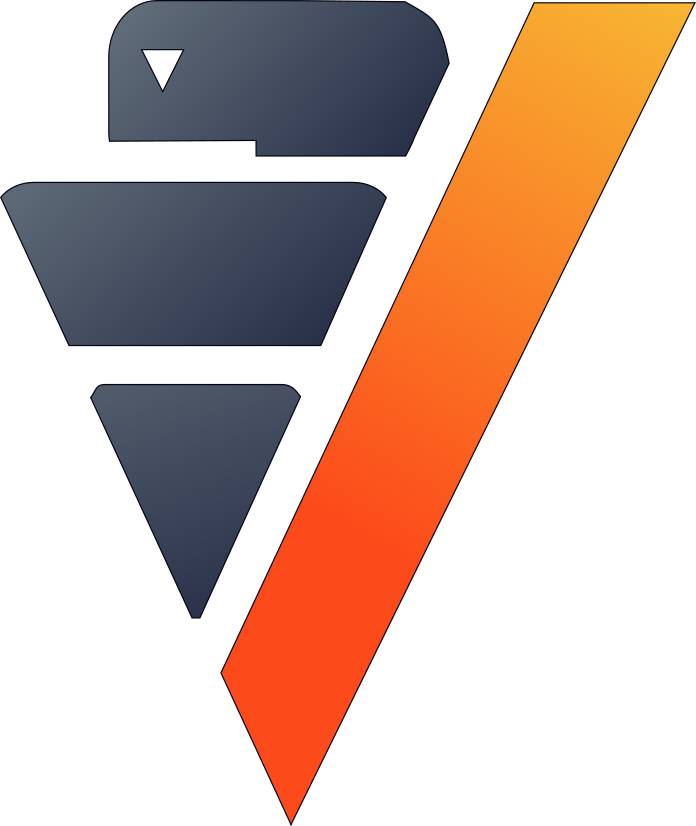

In [5]:
vdf["age"].fillna(method = "avg",
                  by = ["pclass", "sex"])
vdf["age"]

The features 'embarked' and 'fare' have few missing values. Instead of using a technique to impute them, we can drop them using the 'dropna' method.

1 element was filtered.
2 elements were filtered.


,123pclassInt,123survivedInt,AbcVarchar(164),AbcsexVarchar(20),"123ageNumeric(6,3)",123sibspInt,123parchInt,AbcticketVarchar(36),"123fareNumeric(10,5)",AbccabinVarchar(30),AbcembarkedVarchar(20),AbcboatVarchar(100),123bodyInt,AbcVarchar(100)
1,1,1,,female,36.0,0,0,PC 17760,135.6333,C32,C,8,[null],
2,1,1,,female,31.0,0,0,16966,134.5,E39 E41,C,3,[null],
3,1,1,,female,21.0,0,0,113795,26.55,[null],S,8 10,[null],
4,1,1,,female,50.0,1,1,113503,211.5,C80,C,4,[null],
5,1,1,,female,45.0,1,1,36928,164.8667,[null],S,8,[null],
6,1,1,,female,31.0,0,2,36928,164.8667,C7,S,8,[null],
7,1,1,,female,55.0,0,0,PC 17760,135.6333,C32,C,8,[null],
8,1,1,,female,60.0,1,0,110813,75.25,D37,C,5,[null],
9,1,1,,female,35.0,0,0,PC 17755,512.3292,[null],C,3,[null],
10,1,1,,female,37.2635658914729,0,0,PC 17585,79.2,[null],C,D,[null],

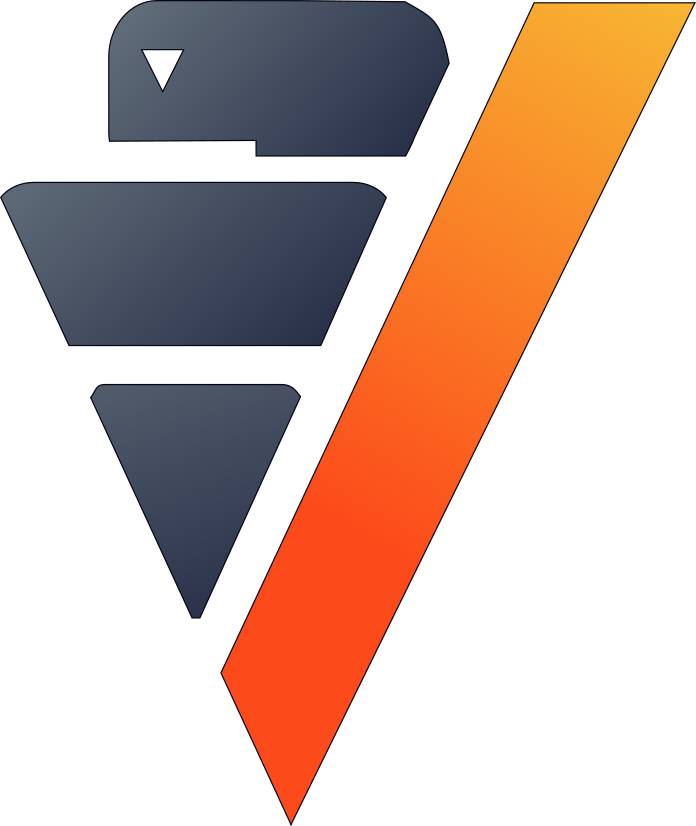

In [6]:
vdf["fare"].dropna()
vdf["embarked"].dropna()

Many techniques are available when using the 'fillna' method.

In [7]:
help(vdf["embarked"].fillna)

Help on method fillna in module verticapy.vcolumn:

fillna(val=None, method: str = 'auto', expr: str = '', by: list = [], order_by: list = []) method of verticapy.vcolumn.vColumn instance
        ---------------------------------------------------------------------------
        Fills missing elements in the vColumn with a user-specified rule.
    
        Parameters
        ----------
        val: int/float/str, optional
                Value to use to impute the vColumn.
        method: dict, optional
                Method to use to impute the missing values.
                        auto    : Mean for the numerical and Mode for the categorical vColumns.
                        bfill   : Back Propagation of the next element (Constant Interpolation).
                        ffill   : Propagation of the first element (Constant Interpolation).
                        mean    : Average.
                        median  : median.
                        mode    : mode (most occurent elemen

VerticaPy will adapt the SQL code generation to only generate what is needed.

In [8]:
print(vdf.current_relation())

(
   SELECT
     * 
   FROM
 (
   SELECT
     "pclass",
     "survived",
     "name",
     "sex",
     COALESCE("age", AVG("age") OVER (PARTITION BY "pclass", "sex")) AS "age",
     "sibsp",
     "parch",
     "ticket",
     "fare",
     "cabin",
     "embarked",
     COALESCE("boat", 'No Lifeboat') AS "boat",
     "body",
     "home.dest" 
   FROM
 "public"."titanic") 
VERTICAPY_SUBTABLE WHERE ("fare" IS NOT NULL) AND ("embarked" IS NOT NULL)) 
VERTICAPY_SUBTABLE


,123pclassInt,123survivedInt,AbcVarchar(164),AbcsexVarchar(20),"123ageNumeric(6,3)",123sibspInt,123parchInt,AbcticketVarchar(36),"123fareNumeric(10,5)",AbccabinVarchar(30),AbcembarkedVarchar(20),AbcboatVarchar(100),123bodyInt,AbcVarchar(100)
1,2,1,,male,30.8592857142857,0,0,244373,13.0,[null],S,14,[null],
2,2,1,,male,31.0,0,0,244270,13.0,[null],S,9,[null],
3,2,1,,male,2.0,1,1,29103,23.0,[null],S,14,[null],
4,2,1,,male,3.0,1,1,29106,18.75,[null],S,4,[null],
5,2,1,,male,0.83,1,1,29106,18.75,[null],S,4,[null],
6,2,1,,male,30.0,0,0,C.A. 34644,12.7375,[null],C,14,[null],
7,2,1,,male,29.0,0,0,SC/PARIS 2147,13.8583,[null],C,9,[null],
8,2,1,,male,30.8592857142857,0,0,SC/PARIS 2146,13.8625,[null],C,9,[null],
9,2,1,,male,22.0,0,0,W./C. 14260,10.5,[null],S,13,[null],
10,2,1,,male,3.0,1,1,230080,26.0,F2,S,D,[null],

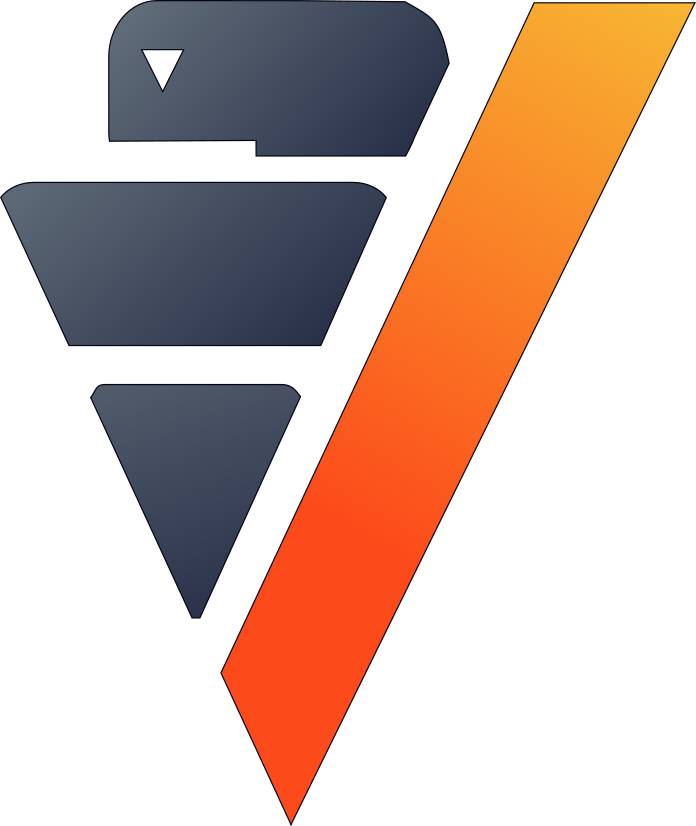

In [9]:
vdf